In [326]:
import os #设置工作路径
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime #时间包
from sklearn.linear_model import LinearRegression  #模型
import jieba  #分词
import jieba.analyse
import imageio #配合做词云的
from wordcloud import WordCloud #词云

# 中文编码
plt.rcParams['font.sans-serif']='simhei'
plt.rcParams['axes.unicode_minus']=False

In [327]:
cwd_path = os.path.abspath('')

# 驱虫市场潜力分析

## 加载数据

- 读取各子类交易额数据并合并

In [328]:
filenames = ['灭鼠杀虫剂市场近三年交易额.xlsx',
 '电蚊香套装市场近三年交易额.xlsx',
 '盘香灭蟑香蚊香盘市场近三年交易额.xlsx',
 '蚊香加热器市场近三年交易额.xlsx',
 '蚊香液市场近三年交易额.xlsx',
 '蚊香片市场近三年交易额.xlsx',
 '防霉防蛀片市场近三年交易额.xlsx']

In [329]:
"盘香灭蟑香蚊香盘市场近三年交易额.xlsx".split(".")[0].replace("市场近三年交易额", "")

'盘香灭蟑香蚊香盘'

- 自定义函数读取单个xlsx文件：提取文件名，作为列名，修改时间格式

In [330]:
def load_xlsx(filename):
    #读取文件
    file_path = os.path.join(cwd_path,"data","驱虫剂市场",filename)
    df = pd.read_excel(file_path)
    #修改日期的格式
    if df['时间'].dtypes == 'int64':
        df['时间'] = pd.to_datetime(df['时间'],unit='D',origin=pd.Timestamp('1899-12-30'))
    #抽取子类目的名字
    colname = filename.split(".")[0].replace("市场近三年交易额", "")
    #重命名列名为子类目名
    df.rename(columns={df.columns[1]:colname},inplace=True)
    #设置时间列作为索引
    df = df.set_index('时间')
    return df

In [331]:
dfs = [load_xlsx(i) for i in filenames]

In [332]:
df = pd.concat(dfs,axis=1).reset_index()
df

,时间,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
0,2018-10-01,1.136548e+08,106531.29,4171283.35,315639.48,7.814546e+06,1032414.29,8541153.59
1,2018-09-01,1.440261e+08,105666.63,6784500.17,457366.41,1.065497e+07,1566651.88,8825870.43
2,2018-08-01,1.540426e+08,201467.03,10709683.41,746513.13,1.783558e+07,2617149.00,6320153.44
3,2018-07-01,1.480032e+08,438635.29,16589184.89,1871757.00,3.887792e+07,6209040.06,6302595.06
4,2018-06-01,1.359438e+08,953749.78,23526385.73,3641025.92,7.649909e+07,12484919.63,7047206.98
5,2018-05-01,1.241642e+08,1238967.37,28118581.25,5032466.78,1.050396e+08,15309721.94,7942340.44
6,2018-04-01,7.509661e+07,841051.93,16420341.87,3130513.43,6.254165e+07,7954875.07,7031364.60
7,2018-03-01,5.918182e+07,475177.48,7900094.91,1198332.81,2.632447e+07,2950648.32,6051561.02
8,2018-02-01,2.292138e+07,33232.95,545917.66,75714.46,2.235774e+06,218915.63,1393948.47
9,2018-01-01,3.653873e+07,54305.20,592663.20,86670.45,1.759451e+06,298146.11,2607776.07


## 补全数据

抽取月份方便建模索引

In [333]:
month = df['时间'].dt.month
month

0     10
1      9
2      8
3      7
4      6
5      5
6      4
7      3
8      2
9      1
10    12
11    11
12    10
13     9
14     8
15     7
16     6
17     5
18     4
19     3
20     2
21     1
22    12
23    11
24    10
25     9
26     8
27     7
28     6
29     5
30     4
31     3
32     2
33     1
34    12
35    11
Name: 时间, dtype: int32

- 循环预测2018年11月和12月的销售额

In [334]:
newrow = [df]
for i in [11,12]:
    # 抽取对月份的数据
    dm = df[month == i]   #2015.11  2016.11  2017.11 
    # 训练x是年份
    xtrain = np.array(dm['时间'].dt.year).reshape(-1,1)
    # 测试y是新增的行，对应的日期
    ytest = [datetime.datetime(2018,i,1)]
    for j in range(1,len(dm.columns)):
        # 训练y是指定的列
        ytrain = np.array(dm.iloc[:,j]).reshape(-1,1)
        # 回归建模
        lm = LinearRegression().fit(xtrain,ytrain)
        # 预测当测试x为2018时销售额 yhat
        yhat = lm.predict(np.array([2018]).reshape(-1,1))
        ytest.append(round(yhat[0][0],2))
    #给预测结果赋值对应的列名
    print(ytest)
    newrow.append(pd.DataFrame([dict(zip(df.columns,ytest))]))
df = pd.concat(newrow, ignore_index=True)
df

[datetime.datetime(2018, 11, 1, 0, 0), 71752495.99, 38692.61, 1801318.82, 193874.39, 5543203.83, 776627.04, 6678677.55]
[datetime.datetime(2018, 12, 1, 0, 0), 52567630.68, 50204.53, 928554.26, 86849.17, 3081491.99, 426812.59, 3958717.58]


,时间,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
0,2018-10-01,1.136548e+08,106531.29,4171283.35,315639.48,7.814546e+06,1032414.29,8541153.59
1,2018-09-01,1.440261e+08,105666.63,6784500.17,457366.41,1.065497e+07,1566651.88,8825870.43
2,2018-08-01,1.540426e+08,201467.03,10709683.41,746513.13,1.783558e+07,2617149.00,6320153.44
3,2018-07-01,1.480032e+08,438635.29,16589184.89,1871757.00,3.887792e+07,6209040.06,6302595.06
4,2018-06-01,1.359438e+08,953749.78,23526385.73,3641025.92,7.649909e+07,12484919.63,7047206.98
5,2018-05-01,1.241642e+08,1238967.37,28118581.25,5032466.78,1.050396e+08,15309721.94,7942340.44
6,2018-04-01,7.509661e+07,841051.93,16420341.87,3130513.43,6.254165e+07,7954875.07,7031364.60
7,2018-03-01,5.918182e+07,475177.48,7900094.91,1198332.81,2.632447e+07,2950648.32,6051561.02
8,2018-02-01,2.292138e+07,33232.95,545917.66,75714.46,2.235774e+06,218915.63,1393948.47
9,2018-01-01,3.653873e+07,54305.20,592663.20,86670.45,1.759451e+06,298146.11,2607776.07


In [335]:
# 去掉原始索引
df.reset_index(drop=True,inplace=True)

In [336]:
# 去掉15年的数据
df = df[df['时间'].dt.year != 2015].copy()
df

,时间,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
0,2018-10-01,1.136548e+08,106531.29,4171283.35,315639.48,7.814546e+06,1032414.29,8541153.59
1,2018-09-01,1.440261e+08,105666.63,6784500.17,457366.41,1.065497e+07,1566651.88,8825870.43
2,2018-08-01,1.540426e+08,201467.03,10709683.41,746513.13,1.783558e+07,2617149.00,6320153.44
3,2018-07-01,1.480032e+08,438635.29,16589184.89,1871757.00,3.887792e+07,6209040.06,6302595.06
4,2018-06-01,1.359438e+08,953749.78,23526385.73,3641025.92,7.649909e+07,12484919.63,7047206.98
5,2018-05-01,1.241642e+08,1238967.37,28118581.25,5032466.78,1.050396e+08,15309721.94,7942340.44
6,2018-04-01,7.509661e+07,841051.93,16420341.87,3130513.43,6.254165e+07,7954875.07,7031364.60
7,2018-03-01,5.918182e+07,475177.48,7900094.91,1198332.81,2.632447e+07,2950648.32,6051561.02
8,2018-02-01,2.292138e+07,33232.95,545917.66,75714.46,2.235774e+06,218915.63,1393948.47
9,2018-01-01,3.653873e+07,54305.20,592663.20,86670.45,1.759451e+06,298146.11,2607776.07


## 整个市场分析
1. 分析整个市场的总体趋势
2. 分析各子类市场销售额占比及变化趋势
3. 分析市场集中度，是否存在垄断

In [337]:
df['整个市场'] = df[df.columns[1:]].sum(1) #交易金额总和列
df

,时间,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片,整个市场
0,2018-10-01,1.136548e+08,106531.29,4171283.35,315639.48,7.814546e+06,1032414.29,8541153.59,1.356363e+08
1,2018-09-01,1.440261e+08,105666.63,6784500.17,457366.41,1.065497e+07,1566651.88,8825870.43,1.724211e+08
2,2018-08-01,1.540426e+08,201467.03,10709683.41,746513.13,1.783558e+07,2617149.00,6320153.44,1.924731e+08
3,2018-07-01,1.480032e+08,438635.29,16589184.89,1871757.00,3.887792e+07,6209040.06,6302595.06,2.182924e+08
4,2018-06-01,1.359438e+08,953749.78,23526385.73,3641025.92,7.649909e+07,12484919.63,7047206.98,2.600962e+08
5,2018-05-01,1.241642e+08,1238967.37,28118581.25,5032466.78,1.050396e+08,15309721.94,7942340.44,2.868459e+08
6,2018-04-01,7.509661e+07,841051.93,16420341.87,3130513.43,6.254165e+07,7954875.07,7031364.60,1.730164e+08
7,2018-03-01,5.918182e+07,475177.48,7900094.91,1198332.81,2.632447e+07,2950648.32,6051561.02,1.040821e+08
8,2018-02-01,2.292138e+07,33232.95,545917.66,75714.46,2.235774e+06,218915.63,1393948.47,2.742488e+07
9,2018-01-01,3.653873e+07,54305.20,592663.20,86670.45,1.759451e+06,298146.11,2607776.07,4.193774e+07


### 市场变化趋势描述
- 每行所有市场的交易金额总和生成新列
- 抽取年份生成新列

In [338]:
df.sort_values(by='时间',ascending=False)

,时间,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片,整个市场
37,2018-12-01,5.256763e+07,50204.53,928554.26,86849.17,3.081492e+06,426812.59,3958717.58,6.110026e+07
36,2018-11-01,7.175250e+07,38692.61,1801318.82,193874.39,5.543204e+06,776627.04,6678677.55,8.678489e+07
0,2018-10-01,1.136548e+08,106531.29,4171283.35,315639.48,7.814546e+06,1032414.29,8541153.59,1.356363e+08
1,2018-09-01,1.440261e+08,105666.63,6784500.17,457366.41,1.065497e+07,1566651.88,8825870.43,1.724211e+08
2,2018-08-01,1.540426e+08,201467.03,10709683.41,746513.13,1.783558e+07,2617149.00,6320153.44,1.924731e+08
3,2018-07-01,1.480032e+08,438635.29,16589184.89,1871757.00,3.887792e+07,6209040.06,6302595.06,2.182924e+08
4,2018-06-01,1.359438e+08,953749.78,23526385.73,3641025.92,7.649909e+07,12484919.63,7047206.98,2.600962e+08
5,2018-05-01,1.241642e+08,1238967.37,28118581.25,5032466.78,1.050396e+08,15309721.94,7942340.44,2.868459e+08
6,2018-04-01,7.509661e+07,841051.93,16420341.87,3130513.43,6.254165e+07,7954875.07,7031364.60,1.730164e+08
7,2018-03-01,5.918182e+07,475177.48,7900094.91,1198332.81,2.632447e+07,2950648.32,6051561.02,1.040821e+08


In [339]:
df.insert(1,'year',df['时间'].dt.year) #年份列
df

,时间,year,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片,整个市场
0,2018-10-01,2018,1.136548e+08,106531.29,4171283.35,315639.48,7.814546e+06,1032414.29,8541153.59,1.356363e+08
1,2018-09-01,2018,1.440261e+08,105666.63,6784500.17,457366.41,1.065497e+07,1566651.88,8825870.43,1.724211e+08
2,2018-08-01,2018,1.540426e+08,201467.03,10709683.41,746513.13,1.783558e+07,2617149.00,6320153.44,1.924731e+08
3,2018-07-01,2018,1.480032e+08,438635.29,16589184.89,1871757.00,3.887792e+07,6209040.06,6302595.06,2.182924e+08
4,2018-06-01,2018,1.359438e+08,953749.78,23526385.73,3641025.92,7.649909e+07,12484919.63,7047206.98,2.600962e+08
5,2018-05-01,2018,1.241642e+08,1238967.37,28118581.25,5032466.78,1.050396e+08,15309721.94,7942340.44,2.868459e+08
6,2018-04-01,2018,7.509661e+07,841051.93,16420341.87,3130513.43,6.254165e+07,7954875.07,7031364.60,1.730164e+08
7,2018-03-01,2018,5.918182e+07,475177.48,7900094.91,1198332.81,2.632447e+07,2950648.32,6051561.02,1.040821e+08
8,2018-02-01,2018,2.292138e+07,33232.95,545917.66,75714.46,2.235774e+06,218915.63,1393948.47,2.742488e+07
9,2018-01-01,2018,3.653873e+07,54305.20,592663.20,86670.45,1.759451e+06,298146.11,2607776.07,4.193774e+07


In [340]:
byyear = df[df.columns[1:]].groupby(['year'], as_index=False).sum()
byyear

,year,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片,整个市场
0,2016,6.080471e+08,7666572.12,4.785285e+07,5905204.71,1.704905e+08,27980839.47,50023001.94,9.179661e+08
1,2017,8.477740e+08,9377531.68,8.635539e+07,10552841.02,3.300656e+08,49068587.96,62678822.18,1.395873e+09
2,2018,1.137893e+09,4537682.09,1.180885e+08,16836723.43,3.582077e+08,51845921.56,72701365.23,1.760111e+09


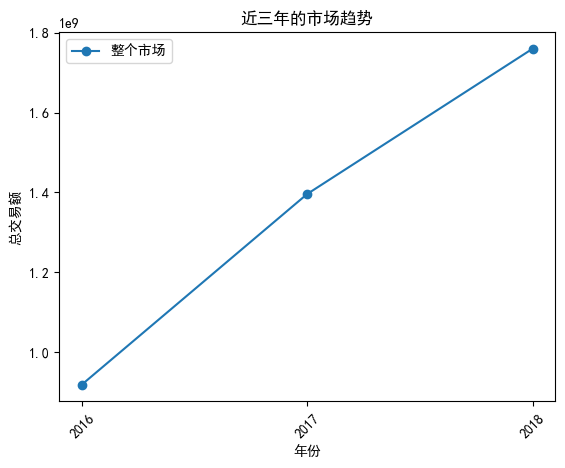

In [341]:
byyear.plot.line(x="year",y="整个市场",marker='o')
plt.title('近三年的市场趋势')
plt.xticks(byyear.year,rotation=45)
plt.xlabel('年份')
plt.ylabel('总交易额')
plt.show()

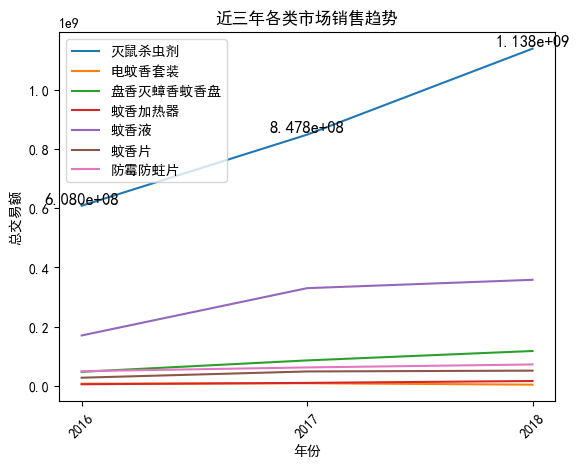

In [342]:
# 分析各类市场销售趋势
byyear.set_index('year').iloc[:,:-1].plot.line()
plt.title('近三年各类市场销售趋势')
plt.xticks(byyear.year,rotation=45)
#在指定位置加文本
for a,b in zip(byyear.year,byyear['灭鼠杀虫剂']):
    plt.text(a,b,'%.3e'% b, ha='center',va='bottom',size=12)
plt.xlabel('年份')
plt.ylabel('总交易额')
plt.show()

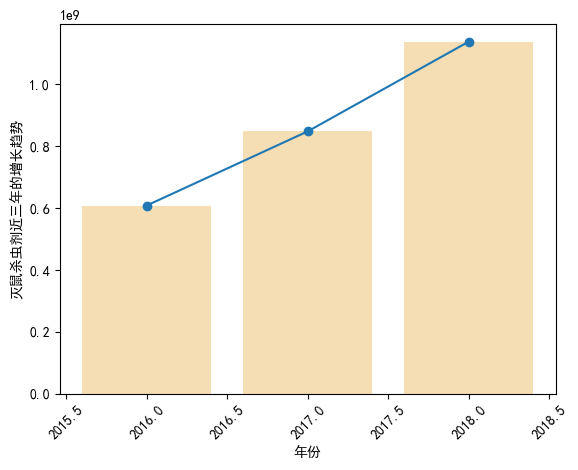

In [343]:
# 绘制柱状图
plt.bar(byyear['year'], byyear['灭鼠杀虫剂'], color='wheat')
# 绘制折线图
plt.plot(byyear['year'], byyear['灭鼠杀虫剂'], marker='o')
plt.xlabel('年份')
plt.ylabel('灭鼠杀虫剂近三年的增长趋势')
plt.xticks(rotation=45)
plt.show()

In [344]:
#计算每年每个子市场的比例
byyear_per = byyear.iloc[:,1:-1].div(byyear["整个市场"],axis=0)
byyear_per.index = byyear.year
byyear_per

,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
year,,,,,,,
2016,0.662385,0.008352,0.052129,0.006433,0.185726,0.030481,0.054493
2017,0.607343,0.006718,0.061865,0.007560,0.236458,0.035153,0.044903
2018,0.646489,0.002578,0.067092,0.009566,0.203514,0.029456,0.041305


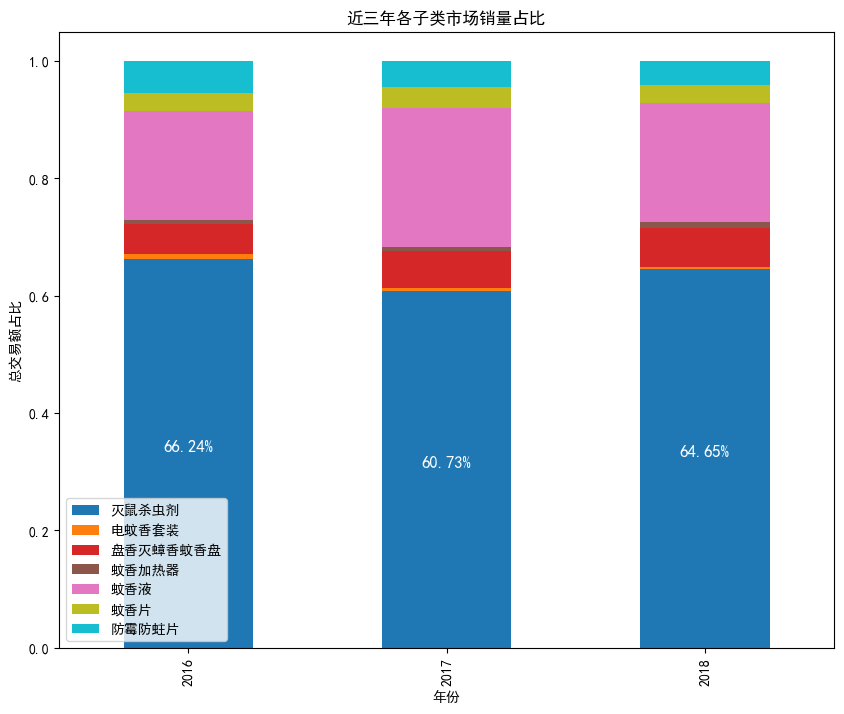

In [345]:
#stacked=True  
byyear_per.plot(kind='bar',stacked=True,figsize=(10,8),colormap='tab10')

for a,b in zip(range(len(byyear_per)),byyear_per['灭鼠杀虫剂']):
    plt.text(a,b/2,f'{b*100:.2f}%', ha='center',va='bottom',size=12,color='white')


plt.xlabel('年份')
plt.ylabel('总交易额占比')
plt.title('近三年各子类市场销量占比')
plt.show()

In [346]:
# 查看各类市场的年增幅
byyear

,year,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片,整个市场
0,2016,6.080471e+08,7666572.12,4.785285e+07,5905204.71,1.704905e+08,27980839.47,50023001.94,9.179661e+08
1,2017,8.477740e+08,9377531.68,8.635539e+07,10552841.02,3.300656e+08,49068587.96,62678822.18,1.395873e+09
2,2018,1.137893e+09,4537682.09,1.180885e+08,16836723.43,3.582077e+08,51845921.56,72701365.23,1.760111e+09


In [347]:
#拿到中间7列
byyear0 = byyear.iloc[:,1:-1] 
byyear0.diff()#一阶差分  17-16  18-17   

,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.397269e+08,1710959.56,38502539.41,4647636.31,1.595750e+08,21087748.49,12655820.24
2,2.901194e+08,-4839849.59,31733116.21,6283882.41,2.814215e+07,2777333.60,10022543.05


In [348]:
#计算年增幅
byyear0 = byyear.iloc[:,1:-1] 
byyear_diff = byyear0.diff().iloc[1:,:].reset_index(drop=True)/byyear0.iloc[:2,:]
byyear_diff.index = ['16-17','17-18']
byyear_diff

,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
16-17,0.394257,0.223171,0.804603,0.787041,0.935976,0.753650,0.253000
17-18,0.342213,-0.516111,0.367471,0.595468,0.085262,0.056601,0.159903


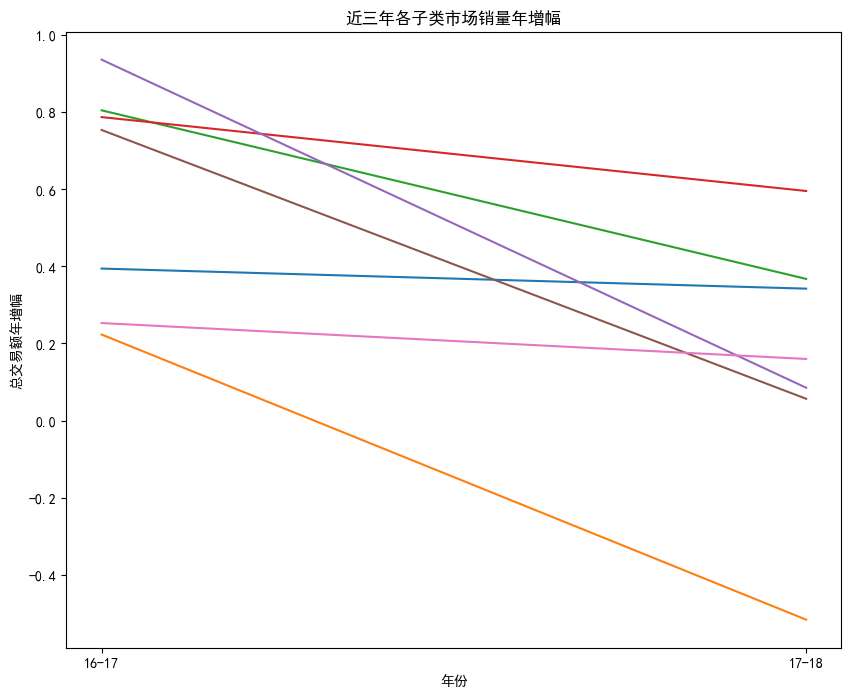

In [349]:
#作图查看
fig, ax = plt.subplots(figsize=(10,8))
# 绘制折线图
ax.plot(byyear_diff)
# 设置x轴刻度和标签
ax.set_xticks(range(len(byyear_diff.index)))
ax.set_xticklabels(byyear_diff.index)
plt.title('近三年各子类市场销量年增幅')
plt.xlabel('年份')
plt.ylabel('总交易额年增幅')
plt.show()

### 市场集中度描述

In [350]:
file_path = os.path.join(cwd_path,"data","驱虫剂市场","top100品牌数据.xlsx")
df1 = pd.read_excel(file_path)
df1.isna().mean()

品牌        0.0
行业排名      0.0
交易指数      0.0
交易增长幅度    0.0
支付转化指数    0.0
操作        0.0
dtype: float64

In [351]:
df1.head()

,品牌,行业排名,交易指数,交易增长幅度,支付转化指数,操作
0,PREMISE/拜灭士,1,530344,-0.3235,1521,趋势分析
1,科凌虫控,2,474937,-0.1910,1581,趋势分析
2,ARS/安速,3,402372,-0.2682,1448,趋势分析
3,思乐智,4,360780,0.2056,841,趋势分析
4,希诺,5,346656,-0.1085,1865,趋势分析


In [352]:
df1.describe(include='all')

,品牌,行业排名,交易指数,交易增长幅度,支付转化指数,操作
count,100,100.000000,100.000000,100.000000,100.000000,100
unique,100,NaN,NaN,NaN,NaN,1
top,PREMISE/拜灭士,NaN,NaN,NaN,NaN,趋势分析
freq,1,NaN,NaN,NaN,NaN,100
mean,NaN,50.500000,147327.560000,0.395790,1247.870000,NaN
std,NaN,29.011492,88177.182391,2.038278,350.304014,NaN
min,NaN,1.000000,65194.000000,-0.781900,577.000000,NaN
25%,NaN,25.750000,86129.000000,-0.266325,967.750000,NaN
50%,NaN,50.500000,118682.500000,-0.061800,1245.000000,NaN
75%,NaN,75.250000,163373.250000,0.334350,1491.500000,NaN


In [353]:
# - 生成交易指数占比,用来描述市场份额
df1['交易指数占比'] = df1['交易指数']/df1['交易指数'].sum()

In [354]:
df1['交易指数占比']

0     0.035998
1     0.032237
2     0.027311
3     0.024488
4     0.023530
        ...   
95    0.004603
96    0.004492
97    0.004465
98    0.004447
99    0.004425
Name: 交易指数占比, Length: 100, dtype: float64

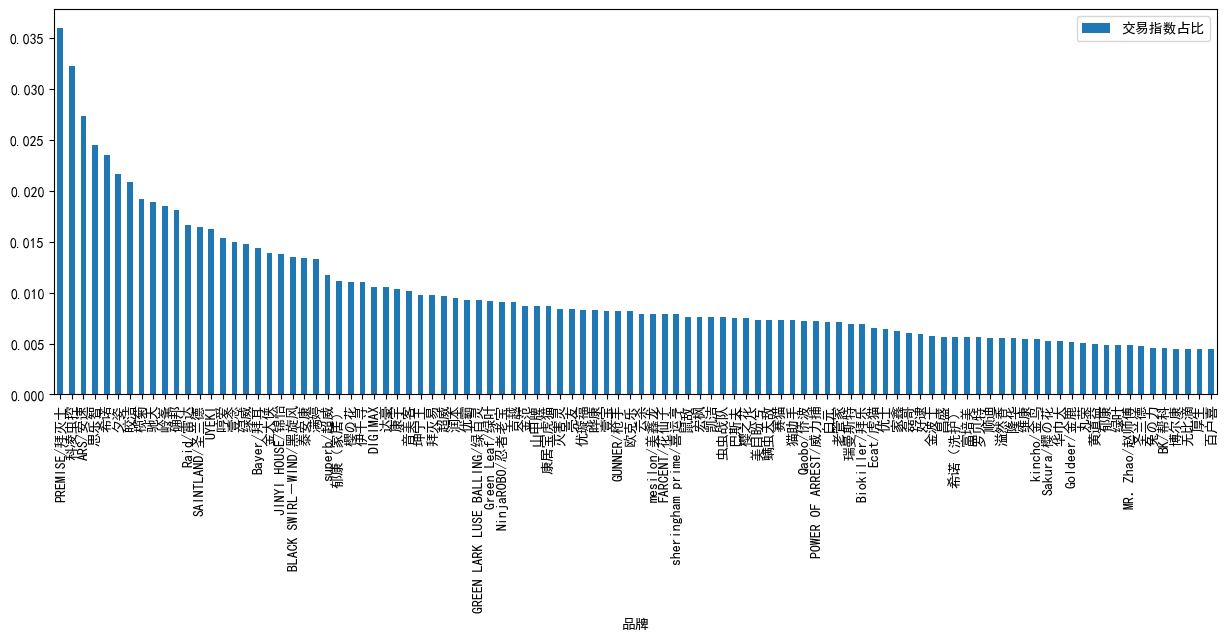

In [355]:
df1.plot(x='品牌',y='交易指数占比',kind='bar',figsize=(15,5))
plt.show()

# 灭鼠杀虫剂市场机会点分析

In [356]:
## HHI
HHI = sum(df1['交易指数占比']**2)
print(HHI)

0.013546334007208918


## 加载数据&清洗数据

In [ ]:
filename1 = ["螨.xlsx","灭鼠.xlsx","杀虫.xlsx", "虱子.xlsx", "蟑螂.xlsx"]
dfs1 = [pd.read_excel(os.path.join(cwd_path,"data","灭鼠杀虫剂细分市场",i)) for i in filename1]
df2 = pd.concat(dfs1,sort=False)
df2.head()

In [ ]:
df2.info()

In [ ]:
#查看缺失值
df2.isna().mean()

- 如果一个特征缺失值占比超过98% 从整个数据角度来讲没有意义则删除

In [ ]:
ind1 = df2.isna().mean()> 0.98
sum(ind1)

In [ ]:
df20 = df2.loc[:,~ind1] #删除缺失值> 0.98的 
# df2[df2.isna().mean()> 0.98] 
# df2[~(df2.isna().mean()> 0.98)] 

In [ ]:
df20.isna().mean()

In [ ]:
ind2 = np.array([len(df20[i].unique()) == 1 for i in df20.columns])
ind2

In [ ]:
df21 = df20.loc[:,~ind2]
df21

In [ ]:
#删除药品登记号 之后的属性 
ind3 = df21.columns.get_loc('药品登记号')
df22 = df21.iloc[:,:ind3]
df22

In [ ]:
unless = ["时间","链接","主图链接","主图视频链接","宝贝标题","运费" ,"下架时间","旺旺"  ,"页码","排名"]
unless

In [ ]:
df23 = df22.drop(columns=unless)

In [ ]:
df23.isna().mean()

In [ ]:
df23.dtypes

In [ ]:
df23 = df23.astype({'宝贝ID':'object'}) #将宝贝ID转成object
df23.reset_index(drop=True,inplace=True)

In [ ]:
df23.head()

## 细化分析

### 产品类别分布

In [ ]:
byclass = df23[['预估销售额','类别']].groupby('类别').sum()

In [ ]:
byclass.plot.barh()

In [ ]:
byclass.plot.pie(autopct='%.2f', subplots=True)

### 灭鼠类别分析

In [ ]:
df24 = df23[df23['类别']== '灭鼠']
df24

In [ ]:
df24['售价'].describe() 

In [ ]:
df24['售价'].plot.hist()

In [ ]:
#自定义分箱  销售额 将连续型变量转成分类型变量
bins = [0,50,100,150,200,250,300,500] #分界线
labels = ['0_50','50_100','100_150','150_200','200_250','250_300','300_500']#箱子的标题
#pd.cut    (0,50] ---> [0,50]
df24['价格区间'] = pd.cut(df24['售价'],bins,labels=labels,include_lowest=True)
df24['价格区间'].value_counts()

In [ ]:
df24

- 计算各价格区间的销售额、销售占比、宝贝数、宝贝数的占比

In [ ]:
#分类的依据----价格区间
by = '价格区间'
df = df24
#根据价格区间求和
df.groupby(by).sum()

In [ ]:
#把预估销售额列抽出来
byc = pd.DataFrame(df.groupby(by).sum().loc[:,['预估销售额']])

In [ ]:
byc

In [ ]:
#销售额占比、宝贝数、宝贝数的占比、单个宝贝的平均销售额
byc['销售额占比'] = byc['预估销售额'] / byc['预估销售额'].sum()
byc['宝贝数'] = df.groupby(by)['宝贝ID'].nunique()
byc['宝贝数占比'] = byc['宝贝数'] / byc['宝贝数'].sum()
byc['单宝贝平均销售额'] =  byc['预估销售额']/byc['宝贝数']
byc

In [ ]:
byc['相对竞争度'] = 1- (byc['单宝贝平均销售额']-byc['单宝贝平均销售额'].min())/(
                        byc['单宝贝平均销售额'].max()-byc['单宝贝平均销售额'].min())
byc

In [ ]:
# 自定义函数 
def byfun(df,by,sort='单宝贝平均销售额'):
    byc = pd.DataFrame(df.groupby(by).sum().loc[:,['预估销售额']])
    #销售额占比、宝贝数、宝贝数的占比、单个宝贝的平均销售额
    byc['销售额占比'] = byc['预估销售额'] / byc['预估销售额'].sum()
    byc['宝贝数'] = df.groupby(by)['宝贝ID'].nunique()
    byc['宝贝数占比'] = byc['宝贝数'] / byc['宝贝数'].sum()
    byc['单宝贝平均销售额'] =  byc['预估销售额']/byc['宝贝数']
    byc['相对竞争度'] = 1- (byc['单宝贝平均销售额']-byc['单宝贝平均销售额'].min())/(
                        byc['单宝贝平均销售额'].max()-byc['单宝贝平均销售额'].min())
    if sort:
        byc.sort_values(sort,ascending=False,inplace=True)
    return byc
byprices = byfun(df24,'价格区间')
byprices

In [ ]:
def mcplot(bydf,figsize=(10,4)):
    ax = bydf.plot(y='相对竞争度',linestyle='-',marker='o',figsize=figsize)
    bydf.plot(y='销售额占比',kind='bar',alpha=0.8,color='wheat',ax=ax)
    plt.grid(True)
    plt.show()
mcplot(byprices)

### 0_50细分价格市场分析

In [ ]:
df25 = df24[df24['价格区间']=='0_50']

In [ ]:
df25['售价'].plot.hist()

In [ ]:
#自定义分箱  销售额 将连续型变量转成分类型变量
bins_01 = [0,10,20,30,40,50] #分界线
labels_01 = ['0_10','10_20','20_30','30_40','40_25']#箱子的标题
#pd.cut    (0,50] ---> [0,50]
df25['价格子区间'] = pd.cut(df25['售价'],bins_01,labels=labels_01,include_lowest=True).astype(str)
df25['价格区间'] = df25['价格区间'].astype(str)
df25.info()

In [ ]:
byprices_01 = byfun(df25,'价格子区间')
byprices_01

In [ ]:
mcplot(byprices_01)

### 细分市场的其他属性分析

In [ ]:
bystore = byfun(df25,'店铺类型')
bystore

In [ ]:
mcplot(bystore)

In [ ]:
bytype = byfun(df25,'型号')
#预估销售额 前5%的型号
bytype1 = bytype[bytype['预估销售额']>=bytype['预估销售额'].quantile(0.95)]
bytype1

In [ ]:
mcplot(bytype1)

In [ ]:
byshape = byfun(df25,'物理形态')
byshape

In [ ]:
mcplot(byshape)

In [ ]:
df25

## 品类分布(占比)

In [ ]:
filename2 = ['安速家居近30天销售数据.xlsx', '拜耳近30天销售数据.xlsx', '科凌虫控旗舰店近30天销售数据.xlsx']
filename2

In [ ]:
df3 = pd.read_excel(os.path.join(cwd_path,"data","竞争数据","商品销售数据",filename2[2]) )
df3.head(1) 

In [ ]:
# 删除无用特征
def load_xlsx_title(filename):
    file_path = os.path.join(cwd_path,"data","竞争数据","商品销售数据",filename)
    df = pd.read_excel(file_path)
    unless = ['序号','店铺名称','商品名称','主图链接','商品链接']
    df.drop(columns=unless,inplace=True)
    return df

In [ ]:
df3bai = load_xlsx_title(filename2[1])
df3bai.head()

In [ ]:
df3an = load_xlsx_title(filename2[0])
df3an.head()

In [ ]:
df3kl = load_xlsx_title(filename2[2])
df3kl.head()

### 类目

In [ ]:
bai31 = df3bai.groupby('类目').sum()
bai31

In [ ]:
an31 = df3an.groupby('类目').sum()
an31

In [ ]:
kl31 = df3kl.groupby('类目').sum()
kl31

In [ ]:
#饼图  [0,1,2]
fig,axes = plt.subplots(1,3,figsize=(10,6)) 
ax = axes[0] #第一个拜耳
bai31['销售额'].plot.pie(autopct='%.f',title='拜耳',startangle=30,ax=ax)
ax.set_ylabel('')
ax = axes[1] #第二个安速
an31['30天销售额'].plot.pie(autopct='%.f',title='安速',startangle=60,ax=ax)
ax.set_ylabel('')
ax = axes[2] #第三个科凌虫控
kl31['30天销售额'].plot.pie(autopct='%.f',title='科凌虫控',startangle=90,ax=ax)
ax.set_ylabel('')
plt.show()

### 适用对象

In [ ]:
bai32 = df3bai.groupby('使用对象').sum()
bai32

In [ ]:
an32 = df3an.groupby('适用对象').sum()
an32

In [ ]:
kl32 = df3kl.groupby('适用对象').sum()
kl32

In [ ]:
#饼图  [0,1,2]
fig,axes = plt.subplots(1,3,figsize=(10,6)) 
ax = axes[0] #第一个拜耳
bai32['销售额'].plot.pie(autopct='%.f',title='拜耳',startangle=30,ax=ax)
ax.set_ylabel('')
ax = axes[1] #第二个安速
an32['30天销售额'].plot.pie(autopct='%.f',title='安速',startangle=60,ax=ax)
ax.set_ylabel('')
ax = axes[2] #第三个科凌虫控
kl32['30天销售额'].plot.pie(autopct='%.f',title='科凌虫控',startangle=90,ax=ax)
ax.set_ylabel('')
plt.show()

## 产品结构分析

In [ ]:
filename3 = ['安速全店商品交易数据.xlsx', '拜耳全店商品交易数据.xlsx', '科凌虫控全店商品交易数据.xlsx']
filename3

### 拜耳

In [ ]:
df4bai = pd.read_excel(os.path.join(cwd_path,"data","竞争数据","商品交易数据",filename3[1]))
df4bai.head()

In [ ]:
df4bai.info()

- 5个月的数据，每个商品最多5个月都在卖，至少有1个月，所以需要对商品分类汇总

In [ ]:
df4bai['商品'].value_counts().count()

In [ ]:
df4bai

In [ ]:
#自定义分类汇总函数
def byproduct(df):
    dfb = df.groupby(by=['商品'],as_index=False).agg(
        交易增长幅度=('交易增长幅度','mean'),
        交易金额=('交易金额','sum'),
        商品个数=('商品','count')
    )
    dfb['交易金额占比'] = dfb['交易金额']/dfb['交易金额'].sum()
    return dfb

In [ ]:
bai4 = byproduct(df4bai)
bai4.head()

In [ ]:
bai4.describe(percentiles=[0.1,0.9,0.99])

In [ ]:
def block(x):
    qu = x.quantile(.9)
    out = x.mask(x>qu,qu) #当大于90%分位数的进行替换
    return(out)

In [ ]:
def block2(df):
    df1 = df.copy()
    df1['交易增长幅度'] = block(df1['交易增长幅度']) #使用盖帽法进行替换交易增长幅度
    df1['交易金额占比'] = block(df1['交易金额占比']) #使用盖帽法进行替换交易增长幅度
    return df1

In [ ]:
bai41 = block2(bai4)
bai41.describe(percentiles=[0.1,0.9,0.99])

In [ ]:
#定义波士顿矩阵绘图函数  可以使用均值、中位数来分割(0.33 0.33) 作为波士顿矩阵的切割线 
# mean True  均值
# mean  False  中位数来分割(0.33 0.33)
def plotBOG(df,mean = False,q1=0.5,q2=0.5):
    f,ax = plt.subplots(figsize=(10,8))
    # 设置点的颜色
    color = df['商品个数']
    # 设置点的大小范围
    size_min, size_max = 20, 200
    size_range = df['商品个数'].max() - df['商品个数'].min()
    sizes = size_min + ((df['商品个数'] - df['商品个数'].min()) / size_range) * (size_max - size_min)
    # 绘制散点图
    scatter = ax.scatter(x=df['交易金额占比'],y=df['交易增长幅度'],s=sizes,c=color,cmap='cool')
    # 添加颜色图例
    legend = ax.legend(*scatter.legend_elements(), title='商品个数')
    #给所有的点加行索引，点对应的是行数据(对应商品),方便探索
    for i in range(0,len(df)):
        ax.text(df['交易金额占比'][i]+0.001,df['交易增长幅度'][i],i) #索引标注相对于x轴右移
    if mean:
        plt.axvline(df['交易金额占比'].mean())#垂线
        plt.axhline(df['交易增长幅度'].mean())#水平线
    else:
        plt.axvline(df['交易金额占比'].quantile(q1))#垂线
        plt.axhline(df['交易增长幅度'].quantile(q2))#水平线
    plt.show()



In [ ]:
bai41

In [ ]:
plotBOG(bai41,mean=True)

In [ ]:
plotBOG(bai41,mean=False)

- 查看各个产品结构的产品(明星、爆款、问题，瘦狗放弃)
- 查看实际的数据，不能使用盖帽后的数据

In [ ]:
def extractBOG(df,q1=0.5,q2=0.5,by='交易金额占比'):
    # 明星产品
    star = df.loc[(df['交易金额占比'] >= df['交易金额占比'].quantile(q1))#交易金额大于0.5
          & (df['交易增长幅度'] >= df['交易增长幅度'].quantile(q2)),:] #交易增长幅度大于0.5
    star = star.sort_values(by,ascending=False)
    # 爆款产品
    cow = df.loc[(df['交易金额占比'] >= df['交易金额占比'].quantile(q1))#交易金额大于0.5
          & (df['交易增长幅度'] < df['交易增长幅度'].quantile(q2)),:] #交易增长幅度小于0.5
    cow = cow.sort_values(by,ascending=False)
    # 问题产品
    que = df.loc[(df['交易金额占比'] < df['交易金额占比'].quantile(q1))#交易金额小于0.5
          & (df['交易增长幅度'] >= df['交易增长幅度'].quantile(q2)),:] #交易增长幅度大于0.5
    que = que.sort_values(by,ascending=False)
    
    return star,cow,que

In [ ]:
bai4star,bai4cow,bai4que = extractBOG(bai4)

In [ ]:
bai4star

In [ ]:
bai4cow

In [ ]:
bai4que

In [ ]:
bai4que.sort_values(by=["交易增长幅度"],ascending=False)

## 流量结构分析

In [ ]:
filename4 = ['安速家居旗舰店流量渠道.xlsx', '拜耳官方旗舰店流量渠道.xlsx', '科凌虫控旗舰店流量渠道.xlsx']
filename4

In [ ]:
df5bai = pd.read_excel(os.path.join(cwd_path,"data","竞争数据","流量渠道数据",filename4[1])) 

In [ ]:
df5bai.head(10)

In [ ]:
# 只取交易指数排名前十的流量渠道
df0 = df5bai.copy()
top10 = df0.sort_values('交易指数',ascending=False).reset_index(drop=True).iloc[:10,:]
#计算交易指数占比
top10['交易指数占比'] = top10['交易指数']/top10['交易指数'].sum()
top10.set_index('流量来源',inplace=True)
top10

In [ ]:
#把付费的渠道  进行标记
paid = ['付费流量','直通车','淘宝客']
ind = np.any([top10.index == i for i in paid],axis=0) #true 为付费的
ind

In [ ]:
#自定义函数-流量结构说明
def flow(df):
    # 只取交易指数排名前十的流量渠道
    df0 = df.copy()
    top10 = df0.sort_values('交易指数',ascending=False).reset_index(drop=True).iloc[:10,:]
    #计算交易指数占比
    top10['交易指数占比'] = top10['交易指数']/top10['交易指数'].sum()
    top10.set_index('流量来源',inplace=True)
    #把付费的渠道  进行标记
    paid = ['付费流量','直通车','淘宝客']
    ind = np.any([top10.index == i for i in paid],axis=0) #true 为付费的
    explode = ind * 0.1 #相当于往外爆0.1的距离
    
    ax = top10['交易指数占比'].plot.pie(autopct='%.1f%%',
                            figsize=(8,8),colormap='cool',explode = explode)
    
    ax.set_ylabel('')
    plt.show()
    
    #输出占比：总交易指数、付费流量占比、付费流量带来的交易指数
    salesum = top10['交易指数'].sum() #总交易指数
    paidsum = top10['交易指数占比'][ind].sum() #付费流量占比
    paidsale = salesum * paidsum #付费流量带来的交易指数
    print(f'前十流量中:总交易指数:{salesum:.0f};付费流量占比:{paidsum*100:.2f}%;付费流量带来的交易指数:{paidsale:.0f}')
    
    return top10

In [ ]:
bai5 = flow(df5bai)

In [ ]:
df5an= pd.read_excel(os.path.join(cwd_path,"data","竞争数据","流量渠道数据",filename4[0]))
an5 = flow(df5an)

In [ ]:
df5ke = pd.read_excel(os.path.join(cwd_path,"data","竞争数据","流量渠道数据",filename4[1])) 
ke5 = flow(df5ke)

# 舆情分析

In [ ]:
filename=['安速.xlsx', '德国拜耳.xlsx', '科林虫控.xlsx']
filename

In [ ]:
df6bai = pd.read_excel(os.path.join(cwd_path,"data","竞争数据","评论舆情数据",filename[1]))

In [ ]:
df6bai.head()

In [ ]:
bai6 = list(df6bai['评论'])
bai6[0]

- 去掉停用词(百度的停用词库)

In [ ]:
jieba.lcut('真心坑人啊 还没到 小时就凝固了 小强依然活跃')

In [ ]:
stopwords = list(pd.read_csv(os.path.join(cwd_path,"data","百度停用词表.txt"),
                             names=['stopwords'])['stopwords']) #指定列名转化为列表
stopwords.extend([' ']) #把空格也去掉  蟑螂

In [ ]:
stopwords[0:10] #停用词列表

- 数据清洗-非中英文字符的不要   在分词前逗号 句号不要 

In [ ]:
import re #正则表达式
bai61 = [re.sub(r'[^a-z\u4E00-\u9Fa5]+',' ',i,
                flags=re.I) for i in bai6]#中文字符  \u4E00-\u9Fa5  flags=re.I 不区分大小写

- 分词组合

In [ ]:
bai62 = []
for i in bai61:
    #对每条评论分析
    seg1 = pd.Series(jieba.lcut(i))
    ind1 = pd.Series([len(j) for j in seg1])>1 #长度大于1的保留   
    seg2 = seg1[ind1]
    #去掉停用词 isin
    ind2 = ~seg2.isin(pd.Series(stopwords))
    seg3 = list(seg2[ind2].unique())#去重一下
    if len(seg3)>0:
        bai62.append(seg3)

In [ ]:
bai62[0]  #得到的是大列表套小列表

In [ ]:
#组合多个列表到一个列表
bai63 = [y for x in bai62 for y in x]

In [ ]:
#词频统计
baifreq = pd.Series(bai63).value_counts()

In [ ]:
baifreq[:10]

- 构建一个词云所需要的数据  一个巨大字符串 （用空格分隔的词）

In [ ]:
bai64 = ' '.join(bai63)

- 生成词云

In [ ]:
#读取照片
mask = imageio.v2.imread(os.path.join(cwd_path,"data","leaf.jpg"))
#如果是中文的词云---字体
font = os.path.join(cwd_path,"data","SimHei.ttf")

wc = WordCloud(background_color='white',mask=mask,
                       font_path=font).generate(bai64)
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis('off')#不要坐标轴
plt.show()

- 基于TF-IDF算法进行关键词提取

In [ ]:
jieba.analyse.extract_tags(bai64,20,True)